# Efficient EDA for NYC Yellow Taxi Trip Data

This notebook provides a comprehensive exploratory data analysis (EDA) of the NYC Yellow Taxi trip data for May 2022, inspired by best practices and recipes from "Exploratory Data Analysis with Python Cookbook" by Ayodele Oluleye. The goal is to efficiently extract insights, visualize patterns, and prepare the data for further modeling.

In [15]:
# Section 1: Load Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [16]:
# Section 2: Load Parquet Data
df = pd.read_parquet('../data/yellow_tripdata_2022-05.parquet')
print('Data loaded successfully.')

Data loaded successfully.


In [17]:
# Section 3: Inspect Data Structure
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,17.0,3.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,11.0,3.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,15.5,3.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,41.2,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0


In [18]:
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Shape: (3588295, 19)
Columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [19]:
# Section 4: Summary Statistics
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
VendorID,3588295.0,NaN,NaN,NaN,1.713103,1.0,1.0,2.0,2.0,6.0,0.488809
tpep_pickup_datetime,3588295,NaN,NaN,NaN,2022-05-16 07:50:29.219312,2003-01-01 00:06:06,2022-05-08 18:14:16.500000,2022-05-16 09:14:42,2022-05-23 18:03:17,2022-06-01 23:55:30,NaN
tpep_dropoff_datetime,3588295,NaN,NaN,NaN,2022-05-16 08:08:42.275203,2003-01-01 00:31:38,2022-05-08 18:32:36,2022-05-16 09:33:15,2022-05-23 18:21:03.500000,2022-06-02 00:03:51,NaN
passenger_count,3458771.0,NaN,NaN,NaN,1.393923,0.0,1.0,1.0,1.0,9.0,0.955549
trip_distance,3588295.0,NaN,NaN,NaN,6.856861,0.0,1.15,1.96,3.73,357192.65,690.848782
RatecodeID,3458771.0,NaN,NaN,NaN,1.365674,1.0,1.0,1.0,1.0,99.0,5.239789
store_and_fwd_flag,3458771,2,N,3404113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULocationID,3588295.0,NaN,NaN,NaN,164.573797,1.0,132.0,162.0,234.0,265.0,65.628132
DOLocationID,3588295.0,NaN,NaN,NaN,162.551711,1.0,113.0,162.0,234.0,265.0,70.279259
payment_type,3588295.0,NaN,NaN,NaN,1.183209,0.0,1.0,1.0,1.0,4.0,0.507599


In [20]:
# Section 5: Missing Values Analysis
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending=False)

passenger_count         129524
RatecodeID              129524
store_and_fwd_flag      129524
congestion_surcharge    129524
airport_fee             129524
dtype: int64

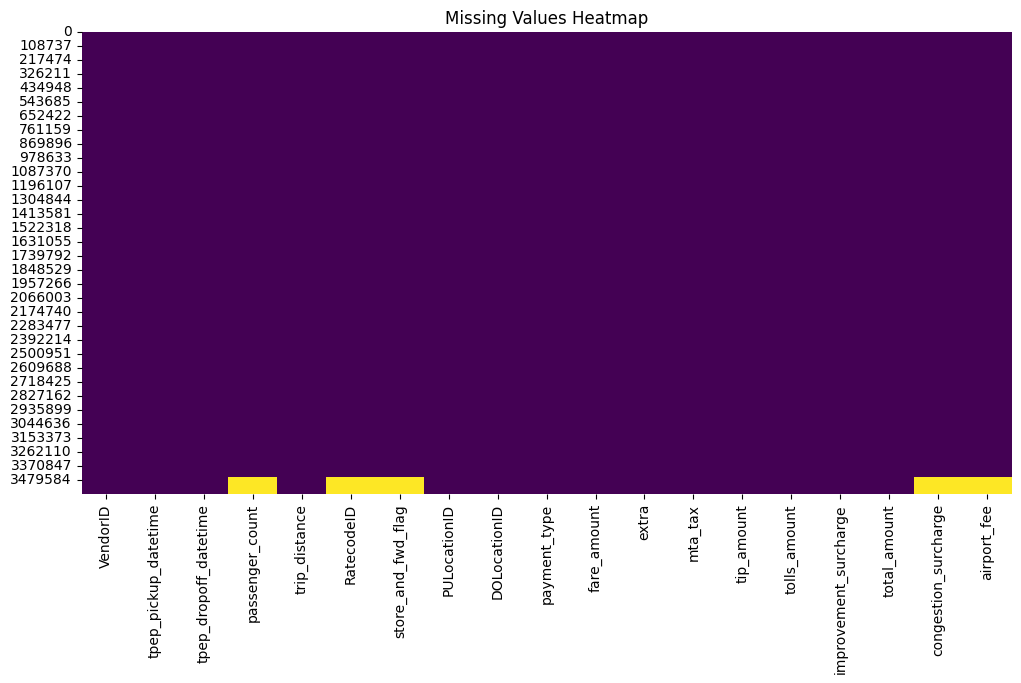

In [21]:
# Visualize missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [22]:
# Section 6: Data Types and Conversion
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [23]:
# Convert pickup and dropoff datetime columns if needed
if 'tpep_pickup_datetime' in df.columns:
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
if 'tpep_dropoff_datetime' in df.columns:
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

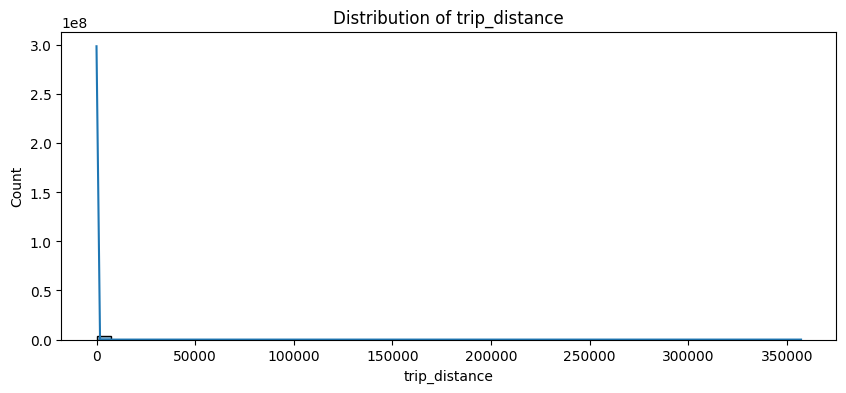

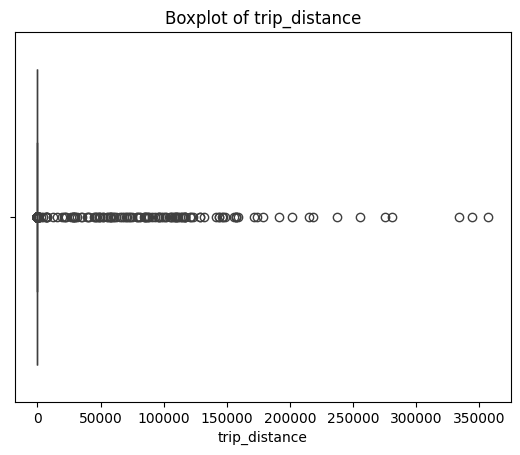

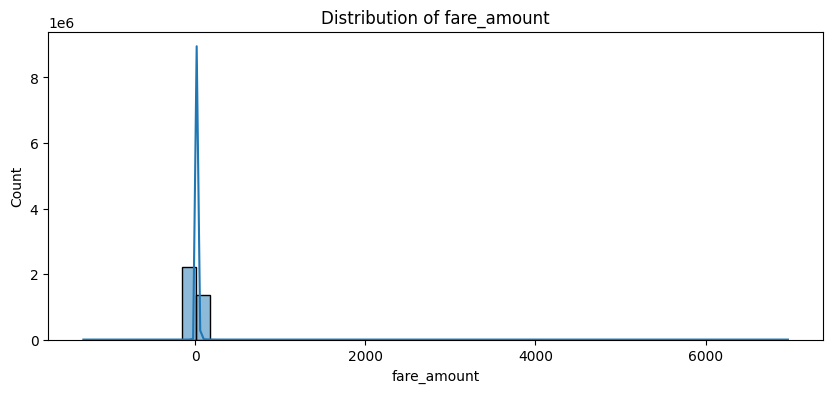

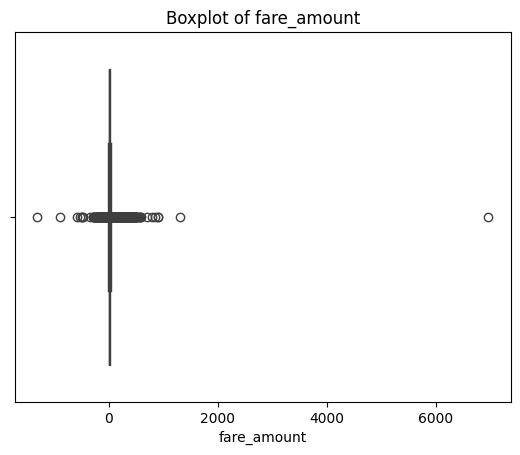

In [24]:
# Section 7: Univariate Analysis
num_cols = ['trip_distance', 'fare_amount']
for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

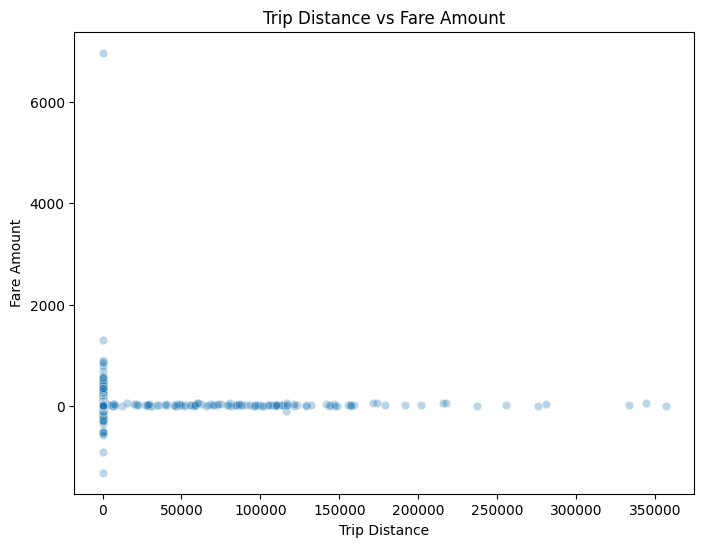

In [25]:
# Section 8: Bivariate Analysis
plt.figure(figsize=(8,6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df, alpha=0.3)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

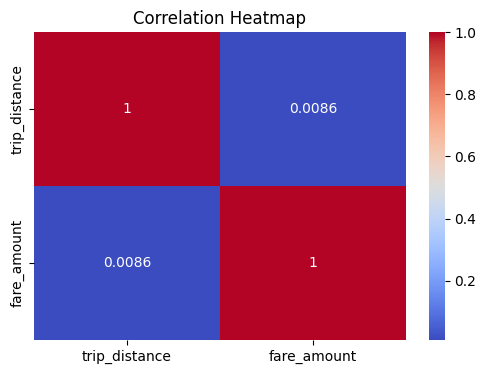

In [26]:
# Section 9: Correlation Analysis
corr = df[num_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

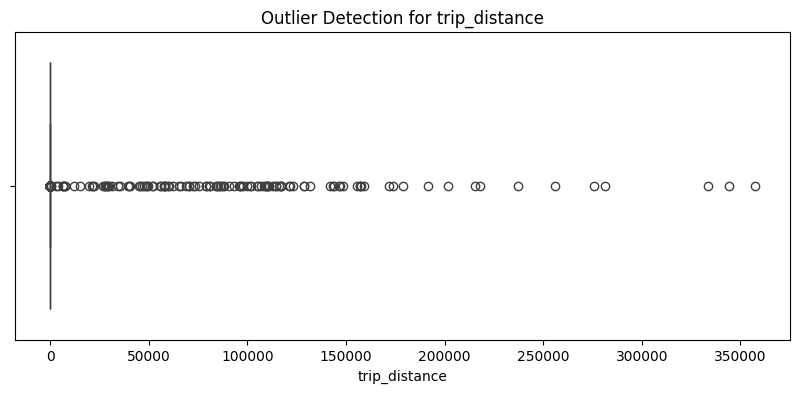

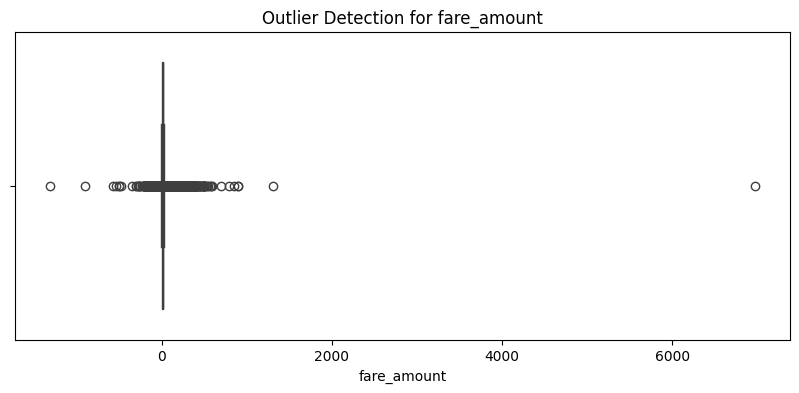

In [27]:
# Section 10: Visualize Distributions (Outlier Detection)
for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[col])
    plt.title(f'Outlier Detection for {col}')
    plt.show()

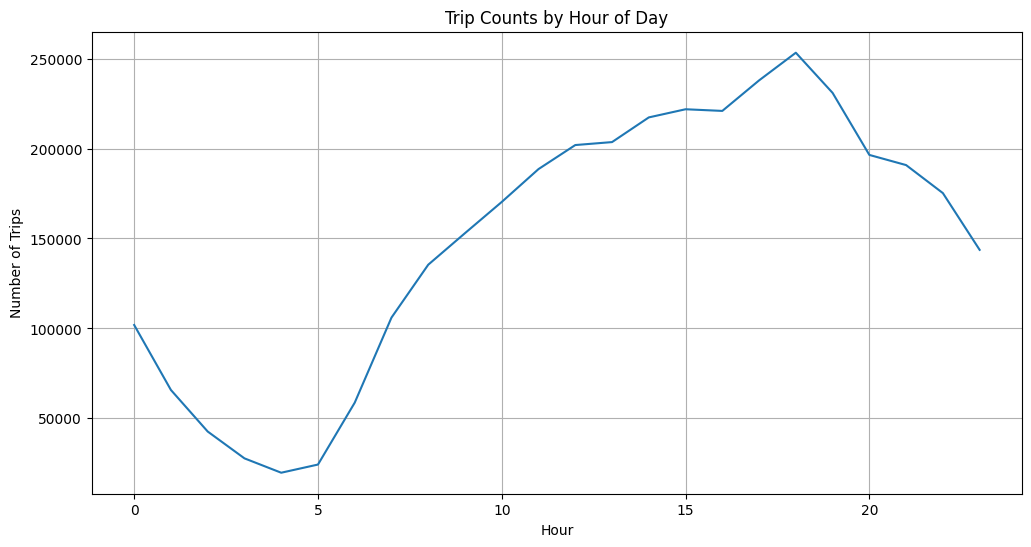

In [ ]:
# Section 11: Time Series Exploration
if 'tpep_pickup_datetime' in df.columns:
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
    hourly_counts = df.groupby('pickup_hour').size()
    plt.figure(figsize=(12,6))
    hourly_counts.plot(kind='line')
    plt.title('Trip Counts by Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel('Number of Trips')
    plt.grid(True)
    plt.show()